Deep Belief Network (DBN) - Test 5

In [1]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader

from DBN import DBN

import matplotlib.pyplot as plt
import torch
import pandas as pd
import torch.nn as nn

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
def compute_class_prototypes(dbn, train_loader, num_classes=10):
    sums = None
    counts = torch.zeros(num_classes, dtype=torch.long)

    for x, y in train_loader:
        h = x.view(x.size(0), -1)
        for rbm in dbn.rbms:
            h = rbm.inference(h)

        if sums is None:
            sums = torch.zeros(num_classes, h.size(1))

        for c in range(num_classes):
            mask = (y == c)
            if mask.any():
                sums[c] += h[mask].sum(dim=0)
                counts[c] += mask.sum()

    counts = counts.clamp_min(1)
    prototypes = sums / counts.unsqueeze(1)

    return prototypes

In [6]:
def generate_digit(dbn, prototypes, class_set):
    img = []
    for class_item in class_set:
        h_top = prototypes[class_item:class_item + 1]

        v = h_top
        for rbm in reversed(dbn.rbms):
            v = rbm.sample_v(v)

        img.append(v.view(28, 28))

    fig, axes = plt.subplots(1, len(class_set), figsize=(len(class_set) * 2, len(class_set)))
    for num, c in enumerate(class_set):
        axes[num].imshow(img[num], cmap='gray')
        axes[num].set_title(f"Number {c}")
        axes[num].axis('off')
    plt.show()

RBM 1 Training:
  Epoch 1/1 - loss: 0.1513
RBM 2 Training:
  Epoch 1/1 - loss: 0.4250


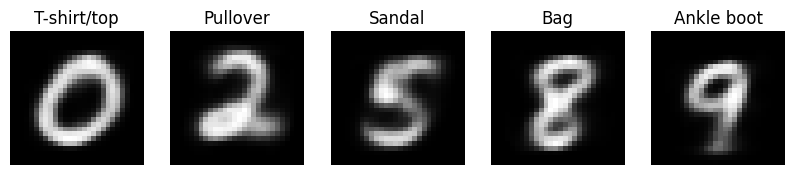

In [4]:
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500], lr=0.05, cd_k=1, category='p')

model.pre_training(train_loader, epochs_per_layer=1)

prototypes = compute_class_prototypes(model, train_loader)

generate_digit(model, prototypes, class_set=[0, 2, 5, 8, 9])

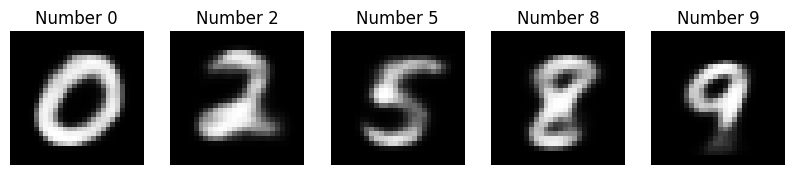

In [ ]:
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500], lr=0.05, cd_k=1, category='p')

model.pre_training(train_loader, epochs_per_layer=10)

prototypes = compute_class_prototypes(model, train_loader)

generate_digit(model, prototypes, class_set=[0, 2, 5, 8, 9])